<a href="https://colab.research.google.com/github/UFM-Market-Trends/UFM-Market-Trends-SDK/blob/main/examples/7_Sector_Fiscal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://colab.research.google.com/notebooks/snippets/gcs.ipynb
from google.colab import auth
auth.authenticate_user()

project_id = 'ufm-market-trends'
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install pyxlsb
import datetime
!pip install git+https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git
import ufmtrends_sdk as trends
today = datetime.date.today().strftime("%Y-%m-%d")
import requests
!pip install xmltodict
import xmltodict
from dateutil.relativedelta import *
!pip install --upgrade --force-reinstall xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git to /tmp/pip-req-build-fmjv2x9d
  Running command git clone -q https://github.com/UFM-Market-Trends/UFM-Market-Trends-SDK.git /tmp/pip-req-build-fmjv2x9d
  Created wheel for ufmtrends-sdk: filename=ufmtrends_sdk-0.0.5-py3-none-any.whl size=7976 sha256=272a52f94aaba8676ffdce70c27a01b082c7ec8cb6f35280c38b595dff7e360c
  Stored in directory: /tmp/pip-ephem-wheel-cache-weg447ze/wheels/d8/63/72/fd94fcb7285b31cd0125721e8d1340b8842b4efc3b6d212027
Successfully built ufmtrends-sdk
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.2 MB/s 


In [ ]:
# "Gobierno central ingresos - mensuales - totales"
revenue_url = "https://www.banguat.gob.gt/sites/default/files/banguat/imm/imm60.xls"
revenue_dataframe = pd.read_excel(revenue_url, sheet_name=0)
revenue_dataframe

,Unnamed: 0,GUATEMALA:,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaN,GOBIERNO CENTRAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,INGRESOS TOTALES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,AÑOS 1995-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-Millones de Quetzales-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,...,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021*,2022*
5,NaN,ENERO,505.0,681.8,838.5,862.6,1091.3,1294.3,1399.3,1966.8,...,4640.707388,4935.736931,4998.974750,5339.699198,5511.382579,5992.327730,6275.745640,6920.074181,7220.492501,8131.407946
6,NaN,FEBRERO,486.9,589.6,724.8,897.2,1038.5,971.3,1048.9,1198.2,...,3208.333034,3315.536308,3570.370375,3601.565471,3891.502159,4068.376506,4199.473753,4577.291281,5046.226187,5569.597266
7,NaN,MARZO,572.4,486.9,717.8,825.0,1015.3,1040.0,1122.9,1215.1,...,4344.980194,4370.110263,4546.912673,4517.047287,5252.060851,5156.608746,5488.497815,4014.296854,6651.993935,8104.527126
8,NaN,ABRIL,539.7,817.4,927.2,1193.0,1395.5,984.4,1757.8,2193.9,...,5043.218919,5331.492530,5370.795853,5562.893435,5980.796598,6308.729117,6507.058722,7231.773065,8128.065014,9367.022414
9,NaN,MAYO,878.2,790.1,1018.5,1338.1,1191.5,1941.0,1599.9,1907.4,...,3743.666468,3796.326404,3749.001309,4760.448176,4176.712616,4596.651704,4967.492174,3757.559883,5419.094789,NaN


In [ ]:
revenue_skip_rows = range(5) # Ignorar 4 filas del encabezado (range/array parameter)
revenue_skip_footer = 3 # Ignorar 2 líneas del pie de página (int parameter)

revenue_dataframe = pd.read_excel(revenue_url, sheet_name=0,
                                  skiprows=revenue_skip_rows,
                                  skipfooter=revenue_skip_footer)
revenue_dataframe

,Unnamed: 0,Unnamed: 1,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021*,2022*
0,NaN,ENERO,505.0,681.8,838.5,862.6,1091.3,1294.3,1399.3,1966.8,...,4640.707388,4935.736931,4998.974750,5339.699198,5511.382579,5992.327730,6275.745640,6920.074181,7220.492501,8131.407946
1,NaN,FEBRERO,486.9,589.6,724.8,897.2,1038.5,971.3,1048.9,1198.2,...,3208.333034,3315.536308,3570.370375,3601.565471,3891.502159,4068.376506,4199.473753,4577.291281,5046.226187,5569.597266
2,NaN,MARZO,572.4,486.9,717.8,825.0,1015.3,1040.0,1122.9,1215.1,...,4344.980194,4370.110263,4546.912673,4517.047287,5252.060851,5156.608746,5488.497815,4014.296854,6651.993935,8104.527126
3,NaN,ABRIL,539.7,817.4,927.2,1193.0,1395.5,984.4,1757.8,2193.9,...,5043.218919,5331.492530,5370.795853,5562.893435,5980.796598,6308.729117,6507.058722,7231.773065,8128.065014,9367.022414
4,NaN,MAYO,878.2,790.1,1018.5,1338.1,1191.5,1941.0,1599.9,1907.4,...,3743.666468,3796.326404,3749.001309,4760.448176,4176.712616,4596.651704,4967.492174,3757.559883,5419.094789,NaN
5,NaN,JUNIO,499.2,697.8,824.3,807.8,941.4,1006.9,1125.1,1299.2,...,3237.792363,3717.243519,3859.195419,4073.804817,4880.548816,4542.934941,4549.799074,3862.856507,5676.776443,NaN
6,NaN,JULIO,608.9,858.6,884.8,1153.8,1277.0,1598.2,1824.7,2256.2,...,5470.887561,5950.802931,5988.671936,6505.046671,6499.138208,6931.271310,7344.116374,6395.612083,9226.957360,NaN
7,NaN,AGOSTO,554.9,653.9,542.9,840.6,1147.7,1067.4,1335.7,1450.0,...,3504.804589,3808.896506,3786.850002,4392.216321,4305.447567,4475.187746,4785.528649,4266.815146,5654.854775,NaN
8,NaN,SEPTIEMBRE,451.0,619.7,634.9,741.1,896.1,1007.1,1331.6,1380.3,...,3476.810005,3758.947687,3657.752424,3909.351832,4059.007777,4194.727635,4568.094674,4538.183301,5599.741605,NaN
9,NaN,OCTUBRE,691.3,801.6,723.1,1097.1,1139.4,1770.0,2196.2,2556.6,...,5368.188643,5413.838075,5473.091055,5920.319469,6311.864981,6732.123513,7490.436728,7903.847929,9497.879057,NaN


In [ ]:
# Recurso opcional de referencia:
# https://stackoverflow.com/questions/23410083/pandas-multiple-columns-into-one-column
# https://stackoverflow.com/questions/23410083/pandas-multiple-columns-into-one-column/48785561#48785561
# https://www.w3resource.com/pandas/dataframe/dataframe-stack.php (muy bueno)

revenue_dataframe = revenue_dataframe.transpose().stack().reset_index()
month_rows = np.arange(0,12)
revenue_dataframe = revenue_dataframe.drop(month_rows).reset_index(drop=True)
revenue_dataframe.columns = ['year', 'month', 'total_revenue'] 
revenue_dataframe.head(15)

,year,month,total_revenue
0,1995,0,505.0
1,1995,1,486.9
2,1995,2,572.4
3,1995,3,539.7
4,1995,4,878.2
5,1995,5,499.2
6,1995,6,608.9
7,1995,7,554.9
8,1995,8,451.0
9,1995,9,691.3


In [ ]:
# Recurso opcional de referencia: 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
# https://www.educative.io/edpresso/how-to-delete-a-column-in-pandas
start_year = 1995 # Año 1995

start_date = datetime.datetime(year=start_year, 
                               month=1, 
                               day=1) # Fecha 1995-1-1

months_since_then = len(revenue_dataframe["month"]) # trimestres hasta el presente
months = pd.period_range(start_date, periods=months_since_then,freq='M')

# https://stackoverflow.com/questions/53898482/clean-way-to-convert-quarterly-periods-to-datetime-in-pandas
dates = pd.PeriodIndex(months, freq='M').to_timestamp()

# date es un tipo que se presta bien a las gráficas de matplotlib 
revenue_dataframe.insert(loc=0, column="date", value=dates, allow_duplicates=True)

#  Puede ser útil (y verse bien) el formato e.g., 1995-01 al escribir en Excel
revenue_dataframe["month"] = months 

del revenue_dataframe["year"] # no la necesitamos más
revenue_dataframe

,date,month,total_revenue
0,1995-01-01,1995-01,505.0
1,1995-02-01,1995-02,486.9
2,1995-03-01,1995-03,572.4
3,1995-04-01,1995-04,539.7
4,1995-05-01,1995-05,878.2
...,...,...,...
323,2021-12-01,2021-12,8162.070915
324,2022-01-01,2022-01,8131.407946
325,2022-02-01,2022-02,5569.597266
326,2022-03-01,2022-03,8104.527126


In [ ]:
spending_url = "https://www.banguat.gob.gt/sites/default/files/banguat/imm/imm65.xls"

spending_skip_rows = range(5) # Ignorar 4 filas del encabezado (range/array parameter)
spending_skip_footer = 3 # Ignorar 2 líneas del pie de página (int parameter)

spending_dataframe = pd.read_excel(spending_url, sheet_name=0,
                                  skiprows=spending_skip_rows,
                                  skipfooter=spending_skip_footer)
spending_dataframe

spending_dataframe = spending_dataframe.transpose().stack().reset_index()
month_rows = np.arange(0,12)
spending_dataframe = spending_dataframe.drop(month_rows).reset_index(drop=True)
spending_dataframe.columns = ['year', 'month', 'total_spending'] 
spending_dataframe
fiscal_dataframe = revenue_dataframe.join(spending_dataframe['total_spending'])
fiscal_dataframe

,date,month,total_revenue,total_spending
0,1995-01-01,1995-01,505.0,401.0
1,1995-02-01,1995-02,486.9,349.6
2,1995-03-01,1995-03,572.4,627.9
3,1995-04-01,1995-04,539.7,435.0
4,1995-05-01,1995-05,878.2,659.9
...,...,...,...,...
323,2021-12-01,2021-12,8162.070915,11756.844922
324,2022-01-01,2022-01,8131.407946,6217.360192
325,2022-02-01,2022-02,5569.597266,6950.366965
326,2022-03-01,2022-03,8104.527126,7448.87125


In [ ]:
internal_debt_url = "https://www.banguat.gob.gt/sites/default/files/banguat/imm/imm54.xls"

internal_debt_skip_rows = range(5) # Ignorar 4 filas del encabezado (range/array parameter)
internal_debt_skip_footer = 20 # Ignorar 20 líneas del pie de página (int parameter)

internal_debt_dataframe = pd.read_excel(internal_debt_url, sheet_name=0,
                                  skiprows=internal_debt_skip_rows,
                                  skipfooter=internal_debt_skip_footer)
internal_debt_dataframe

internal_debt_dataframe = internal_debt_dataframe.transpose().stack().reset_index()
month_rows = np.arange(0,12)
internal_debt_dataframe = internal_debt_dataframe.drop(month_rows).reset_index(drop=True)
TOTAL_INTERNAL_DEBT = "Deuda interna total"
internal_debt_dataframe.columns = ['year', 'month', TOTAL_INTERNAL_DEBT] 
internal_debt_dataframe
fiscal_dataframe = fiscal_dataframe.join(internal_debt_dataframe[TOTAL_INTERNAL_DEBT])
fiscal_dataframe

,date,month,total_revenue,total_spending,Deuda interna total
0,1995-01-01,1995-01,505.0,401.0,4400.4
1,1995-02-01,1995-02,486.9,349.6,4551.0
2,1995-03-01,1995-03,572.4,627.9,4686.5
3,1995-04-01,1995-04,539.7,435.0,4697.6
4,1995-05-01,1995-05,878.2,659.9,4527.0
...,...,...,...,...,...
323,2021-12-01,2021-12,8162.070915,11756.844922,119005.7
324,2022-01-01,2022-01,8131.407946,6217.360192,118984.494535
325,2022-02-01,2022-02,5569.597266,6950.366965,118992.467716
326,2022-03-01,2022-03,8104.527126,7448.87125,122353.677509


In [ ]:
external_debt_url = "https://www.banguat.gob.gt/sites/default/files/banguat/imm/imm50.xls"

external_debt_skip_rows = range(5) # Ignorar 4 filas del encabezado (range/array parameter)
external_debt_skip_footer = 15 # Ignorar 20 líneas del pie de página (int parameter)

external_debt_dataframe = pd.read_excel(external_debt_url, sheet_name=0,
                                  skiprows=external_debt_skip_rows,
                                  skipfooter=external_debt_skip_footer)
external_debt_dataframe

external_debt_dataframe = external_debt_dataframe.transpose().stack().reset_index()
month_rows = np.arange(0,12)
external_debt_dataframe = external_debt_dataframe.drop(month_rows).reset_index(drop=True)
TOTAL_EXTERNAL_DEBT = 'Deuda externa total (USD)'
external_debt_dataframe.columns = ['year', 'month', TOTAL_EXTERNAL_DEBT] 
external_debt_dataframe
fiscal_dataframe = fiscal_dataframe.join(external_debt_dataframe[TOTAL_EXTERNAL_DEBT])
fiscal_dataframe

,date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD)
0,1995-01-01,1995-01,505.0,401.0,4400.4,2147.5
1,1995-02-01,1995-02,486.9,349.6,4551.0,2142.3
2,1995-03-01,1995-03,572.4,627.9,4686.5,2211.5
3,1995-04-01,1995-04,539.7,435.0,4697.6,2220.0
4,1995-05-01,1995-05,878.2,659.9,4527.0,2210.8
...,...,...,...,...,...,...
323,2021-12-01,2021-12,8162.070915,11756.844922,119005.7,11097.1532
324,2022-01-01,2022-01,8131.407946,6217.360192,118984.494535,11069.8528
325,2022-02-01,2022-02,5569.597266,6950.366965,118992.467716,11028.7387
326,2022-03-01,2022-03,8104.527126,7448.87125,122353.677509,10989.287


In [ ]:
# Recurso opcional de referencia:
# https://stackoverflow.com/questions/18175489/sending-soap-request-using-python-requests
# https://www.banguat.gob.gt/variables/ws/TipoCambio.asmx?op=TipoCambioDia
# https://stackoverflow.com/questions/45250626/how-to-parse-soap-xml-with-python

#import requests # libería necesaria (importada en la primera celda del notebook)
# from xml.etree import ElementTree # (también necesitas esta)


exchange_rate_url = "http://www.banguat.gob.gt/variables/ws/TipoCambio.asmx"
headers = {'content-type': 'application/soap+xml; charset=utf-',
           'content-length': '250'}

'''
El string a continuación debe estar 100% escrito correctamente.
El servidor SOAP se quejará si hay un espacio antes del primer nodo XML, 
incluso...
'''
body = """<?xml version="1.0" encoding="utf-8"?>
<soap12:Envelope xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:soap12="http://www.w3.org/2003/05/soap-envelope">
  <soap12:Body>
    <TipoCambioDia xmlns="http://www.banguat.gob.gt/variables/ws/" />
  </soap12:Body>
</soap12:Envelope>
"""

response = requests.post(exchange_rate_url,data=body,headers=headers)
print('Response content')
print(response.content)

print('\nParsed content')

# # !pip install xmltodict
# import xmltodict

stack_d = xmltodict.parse(response.content)
print(stack_d['soap:Envelope']['soap:Body']
      ['TipoCambioDiaResponse']['TipoCambioDiaResult'])

print('\nTipo de cambio de referencia')
print(stack_d['soap:Envelope']['soap:Body']
      ['TipoCambioDiaResponse']['TipoCambioDiaResult']['CambioDolar']
      ['VarDolar']['referencia'])

Response content
b'<?xml version="1.0" encoding="utf-8"?><soap:Envelope xmlns:soap="http://www.w3.org/2003/05/soap-envelope" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema"><soap:Body><TipoCambioDiaResponse xmlns="http://www.banguat.gob.gt/variables/ws/"><TipoCambioDiaResult><CambioDolar><VarDolar><fecha>06/07/2022</fecha><referencia>7.74979</referencia></VarDolar></CambioDolar><TotalItems>1</TotalItems></TipoCambioDiaResult></TipoCambioDiaResponse></soap:Body></soap:Envelope>'

Parsed content
{'CambioDolar': {'VarDolar': {'fecha': '06/07/2022', 'referencia': '7.74979'}}, 'TotalItems': '1'}

Tipo de cambio de referencia
7.74979


In [ ]:
# Recurso opcional de referencia:
# https://stackoverflow.com/questions/18175489/sending-soap-request-using-python-requests
# https://www.banguat.gob.gt/variables/ws/TipoCambio.asmx?op=TipoCambioDia
# https://stackoverflow.com/questions/45250626/how-to-parse-soap-xml-with-python

#import requests # libería necesaria (importada en la primera celda del notebook)
# from xml.etree import ElementTree # (también necesitas esta)


exchange_rate_url = "http://www.banguat.gob.gt/variables/ws/TipoCambio.asmx"
headers = {'content-type': 'application/soap+xml; charset=utf-',
           'content-length': '10'}

'''
El string a continuación debe estar 100% escrito correctamente.
El servidor SOAP se quejará si hay un espacio antes del primer nodo XML, 
incluso...
'''
body = """<?xml version="1.0" encoding="utf-8"?>
<soap12:Envelope xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema" xmlns:soap12="http://www.w3.org/2003/05/soap-envelope">
  <soap12:Body>
    <TipoCambioFechaInicial xmlns="http://www.banguat.gob.gt/variables/ws/">
      <fechainit>1/1/1995</fechainit>
    </TipoCambioFechaInicial>
  </soap12:Body>
</soap12:Envelope>
"""

response = requests.post(exchange_rate_url,data=body,headers=headers)
print('Response content')
print(response.content)

print('\nParsed content')

exchange_rates_soap = (xmltodict.parse(response.content)['soap:Envelope']
                       ['soap:Body']['TipoCambioFechaInicialResponse']
                       ['TipoCambioFechaInicialResult']['Vars']['Var'])
print(exchange_rates_soap)


print("\nImprimir primeras 10 fechas a modo de ejemplo")
for i in range(10):
  element = exchange_rates_soap[i]
  print(f"***{element['fecha']} -- {element['moneda']}")
  print(f"    compra: {element['compra']} - venta: {element['venta']}")


Response content
b'<?xml version="1.0" encoding="utf-8"?><soap:Envelope xmlns:soap="http://www.w3.org/2003/05/soap-envelope" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema"><soap:Body><TipoCambioFechaInicialResponse xmlns="http://www.banguat.gob.gt/variables/ws/"><TipoCambioFechaInicialResult><Vars><Var><moneda>2</moneda><fecha>01/01/1995</fecha><venta>5.64911</venta><compra>5.62518</compra></Var><Var><moneda>2</moneda><fecha>02/01/1995</fecha><venta>5.64911</venta><compra>5.62518</compra></Var><Var><moneda>2</moneda><fecha>03/01/1995</fecha><venta>5.66524</venta><compra>5.63181</compra></Var><Var><moneda>2</moneda><fecha>04/01/1995</fecha><venta>5.66524</venta><compra>5.63181</compra></Var><Var><moneda>2</moneda><fecha>05/01/1995</fecha><venta>5.67668</venta><compra>5.65213</compra></Var><Var><moneda>2</moneda><fecha>06/01/1995</fecha><venta>5.70438</venta><compra>5.67554</compra></Var><Var><moneda>2</moneda><fecha>07/01/1995</fecha><

In [ ]:
# Recurso opcional de referencia:
# https://stackoverflow.com/questions/44365209/generate-a-pandas-dataframe-from-ordereddict
# https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
# https://strftime.org/

CURRENCY = 'currency'
DATE = 'date'
SELL = 'sell'
BUY = 'buy'

exchange_rate_dataframe = pd.DataFrame(exchange_rates_soap, 
                                       columns=['moneda', 'fecha', 
                                                'venta', 'compra']
)

exchange_rate_dataframe.columns = [CURRENCY, DATE, SELL, BUY]
exchange_rate_dataframe[CURRENCY] = 'USD'

exchange_rate_dataframe[DATE] = pd.to_datetime(exchange_rate_dataframe[DATE], 
                                               format='%d/%m/%Y')
REFERENCE = 'reference_exchange_rate'
# https://www.banguat.gob.gt/cambio/cambio.pdf
exchange_rate_dataframe[REFERENCE] = (
    (pd.to_numeric(exchange_rate_dataframe[BUY]) 
    + pd.to_numeric(exchange_rate_dataframe[SELL])
    ) / 2)

exchange_rate_dataframe.head(-5)

,currency,date,sell,buy,reference_exchange_rate
0,USD,1995-01-01,5.64911,5.62518,5.637145
1,USD,1995-01-02,5.64911,5.62518,5.637145
2,USD,1995-01-03,5.66524,5.63181,5.648525
3,USD,1995-01-04,5.66524,5.63181,5.648525
4,USD,1995-01-05,5.67668,5.65213,5.664405
...,...,...,...,...,...
10034,USD,2022-06-27,7.75404,7.75404,7.754040
10035,USD,2022-06-28,7.7598,7.7598,7.759800
10036,USD,2022-06-29,7.75819,7.75819,7.758190
10037,USD,2022-06-30,7.75608,7.75608,7.756080


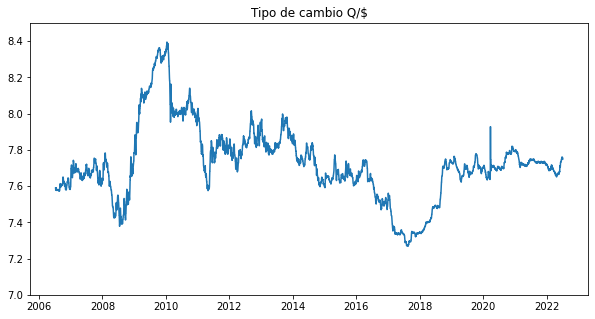

In [ ]:
# Esta celda está para propositos de visualización y escribir más facilmente
# esta gráfica en Excel.
days_back_exchange_rate = -365 * 16

exchange_rate_data = {
    'labels': exchange_rate_dataframe['date'].dt.strftime('%Y-%m')[days_back_exchange_rate:],
    'dates': exchange_rate_dataframe['date'][days_back_exchange_rate:],
    'Tipo de cambio histórico': list(exchange_rate_dataframe[REFERENCE][days_back_exchange_rate:])
}

plt.figure(figsize=(10,5))
plt.plot(exchange_rate_data['dates'],
         exchange_rate_data['Tipo de cambio histórico'])
plt.ylim(7, 8.5)
plt.title("Tipo de cambio Q/$")
plt.show()

In [ ]:
pd.DataFrame(exchange_rate_data)

,labels,dates,Tipo de cambio histórico
4204,2006-07,2006-07-11,7.589090
4205,2006-07,2006-07-12,7.579725
4206,2006-07,2006-07-13,7.578545
4207,2006-07,2006-07-14,7.585830
4208,2006-07,2006-07-15,7.585830
...,...,...,...
10039,2022-07,2022-07-02,7.756080
10040,2022-07,2022-07-03,7.756080
10041,2022-07,2022-07-04,7.756080
10042,2022-07,2022-07-05,7.752810


In [ ]:
historical_rates_csv = "Tipo-Cambio-Historico.csv"
pd.DataFrame(exchange_rate_data).to_csv(historical_rates_csv, index=False)

In [ ]:
bucket_path = 'ufm-market-trends/guatemala/tipo-de-cambio-historico'
csv_file = historical_rates_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Streaming output truncated to the last 5000 lines.
2008-10,2008-10-28,7.5347
2008-10,2008-10-29,7.55245
2008-10,2008-10-30,7.56657
2008-10,2008-10-31,7.56657
2008-11,2008-11-01,7.56657
2008-11,2008-11-02,7.56657
2008-11,2008-11-03,7.55887
2008-11,2008-11-04,7.55774
2008-11,2008-11-05,7.54568
2008-11,2008-11-06,7.53321
2008-11,2008-11-07,7.52375
2008-11,2008-11-08,7.52375
2008-11,2008-11-09,7.52375
2008-11,2008-11-10,7.53789
2008-11,2008-11-11,7.55906
2008-11,2008-11-12,7.56171
2008-11,2008-11-13,7.58706
2008-11,2008-11-14,7.63311
2008-11,2008-11-15,7.63311
2008-11,2008-11-16,7.63311
2008-11,2008-11-17,7.65692
2008-11,2008-11-18,7.6481
2008-11,2008-11-19,7.65528
2008-11,2008-11-20,7.69111
2008-11,2008-11-21,7.75669
2008-11,2008-11-22,7.75669
2008-11,2008-11-23,7.75669
2008-11,2008-11-24,7.76141
2008-11,2008-11-25,7.7349
2008-11,2008-11-26,7.71519
2008-11,2008-11-27,7.70371
2008-11,2008-11-28,7.69008
2008-11,2008-11-29,7.69008
2008-11,2008-11-30,7.69008
2008-12,2008-12-01,7.67324
2008-12

In [ ]:
# Recurso opcional de referencia
# https://stackoverflow.com/questions/32277473/merge-two-dataframes-based-on-multiple-keys-in-pandas
# https://datacarpentry.org/python-ecology-lesson/05-merging-data/index.html
# https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns


fiscal_dataframe = pd.merge(fiscal_dataframe, exchange_rate_dataframe[[DATE,REFERENCE]], 
         on='date')

fiscal_dataframe.iloc[:5]

,date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD),reference_exchange_rate
0,1995-01-01,1995-01,505.0,401.0,4400.4,2147.5,5.637145
1,1995-02-01,1995-02,486.9,349.6,4551.0,2142.3,5.704975
2,1995-03-01,1995-03,572.4,627.9,4686.5,2211.5,5.662100
3,1995-04-01,1995-04,539.7,435.0,4697.6,2220.0,5.739145
4,1995-05-01,1995-05,878.2,659.9,4527.0,2210.8,5.687355


In [ ]:
# Recurso opcional de referencia
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html
'''
Ejecutamos un upward shift en la data. Hasta ahora, 
estaba unida en base al datetime
del primer día del mes, pero no queremos el tipo de cambio de referencia del
primer día del mes para un mes dado (sino, en su lugar, el correpondiente 
al primer día del mes siguiente).
'''
fiscal_dataframe[REFERENCE] = fiscal_dataframe.shift(periods=-1)[REFERENCE]
fiscal_dataframe
#
# Ten mucho cuidado de no correr esta celda más de una vez. Cada vez que lo hagas,
# haras un upward shift. Si no estás seguro, vuelve a correr el notebook completo.
#

,date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD),reference_exchange_rate
0,1995-01-01,1995-01,505.0,401.0,4400.4,2147.5,5.704975
1,1995-02-01,1995-02,486.9,349.6,4551.0,2142.3,5.662100
2,1995-03-01,1995-03,572.4,627.9,4686.5,2211.5,5.739145
3,1995-04-01,1995-04,539.7,435.0,4697.6,2220.0,5.687355
4,1995-05-01,1995-05,878.2,659.9,4527.0,2210.8,5.751875
...,...,...,...,...,...,...,...
322,2021-12-01,2021-12,8162.070915,11756.844922,119005.7,11097.1532,7.719120
323,2022-01-01,2022-01,8131.407946,6217.360192,118984.494535,11069.8528,7.685550
324,2022-02-01,2022-02,5569.597266,6950.366965,118992.467716,11028.7387,7.704400
325,2022-03-01,2022-03,8104.527126,7448.87125,122353.677509,10989.287,7.679470


In [ ]:
# Recurso opcional de referencia.
# https://stackoverflow.com/questions/57580072/changing-period-to-datetime
# https://stackoverflow.com/questions/35066588/is-there-a-simple-way-to-increment-a-datetime-object-one-month-in-python/35067328
# https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe-using-index

'''
(Explicar código)
Si los datos de fiscalidad tienen como último mes octube,
latest_firstday_of_month será igual a un datetime con estructura 2020-10-01
y
latest_firstday_of_nextmonth será igual a un datetime con estructura 2020-11-01
'''
latest_firstday_of_month = pd.to_datetime(fiscal_dataframe.month.astype(str)).iloc[-1]
latest_firstday_of_nextmonth = latest_firstday_of_month + relativedelta(months=+1)
print('latest_firstday_of_nextmonth ', latest_firstday_of_nextmonth.date())

'''
Puedes verificar que el valor del tipo de cambio de referencia
para la fecha <latest_firstday_of_nextmonth> sea el que corresponda en la página
del banco de guatemala 

(Se asume que los datos del tipo de cambio siempre están más actualizados.
De hecho, Banguat los publica a diario.)
'''
latest_rate = float(exchange_rate_dataframe.loc[exchange_rate_dataframe['date'] 
                            == latest_firstday_of_nextmonth][REFERENCE])
print(f'\nTipo de cambio de referencia el {latest_firstday_of_nextmonth.date()}: '
+ f'{latest_rate}' 
+ f'\n\n(el cual usaremos para el mes anterior, {latest_firstday_of_month.date()})')

'''
Finalmente, se recalca, puesto que el upward shift hará del último dato un NaN,
añadimos la variable latest_rate que calculamos arriba.
'''
fiscal_dataframe.at[len(fiscal_dataframe)-1,REFERENCE] = latest_rate
fiscal_dataframe

latest_firstday_of_nextmonth  2022-05-01

Tipo de cambio de referencia el 2022-05-01: 7.66517

(el cual usaremos para el mes anterior, 2022-04-01)


,date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD),reference_exchange_rate
0,1995-01-01,1995-01,505.0,401.0,4400.4,2147.5,5.704975
1,1995-02-01,1995-02,486.9,349.6,4551.0,2142.3,5.662100
2,1995-03-01,1995-03,572.4,627.9,4686.5,2211.5,5.739145
3,1995-04-01,1995-04,539.7,435.0,4697.6,2220.0,5.687355
4,1995-05-01,1995-05,878.2,659.9,4527.0,2210.8,5.751875
...,...,...,...,...,...,...,...
322,2021-12-01,2021-12,8162.070915,11756.844922,119005.7,11097.1532,7.719120
323,2022-01-01,2022-01,8131.407946,6217.360192,118984.494535,11069.8528,7.685550
324,2022-02-01,2022-02,5569.597266,6950.366965,118992.467716,11028.7387,7.704400
325,2022-03-01,2022-03,8104.527126,7448.87125,122353.677509,10989.287,7.679470


In [ ]:
TOTAL_DEBT = "Deuda total (GTQ)"
fiscal_dataframe[TOTAL_DEBT] = (
    fiscal_dataframe[TOTAL_INTERNAL_DEBT] + 
    fiscal_dataframe[TOTAL_EXTERNAL_DEBT] * fiscal_dataframe[REFERENCE] 
    )
fiscal_dataframe.iloc[-5:]

,date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD),reference_exchange_rate,Deuda total (GTQ)
322,2021-12-01,2021-12,8162.070915,11756.844922,119005.7,11097.1532,7.71912,204665.957209
323,2022-01-01,2022-01,8131.407946,6217.360192,118984.494535,11069.8528,7.68555,204062.401722
324,2022-02-01,2022-02,5569.597266,6950.366965,118992.467716,11028.7387,7.70440,203962.282157
325,2022-03-01,2022-03,8104.527126,7448.87125,122353.677509,10989.287,7.67947,206745.577347
326,2022-04-01,2022-04,9367.022414,8574.722076,122530.10663,10925.9188,7.66517,206279.131639


In [ ]:
# Déficit anual (acumulado 12 meses)
deficit_monthly_values = fiscal_dataframe.total_revenue - fiscal_dataframe.total_spending

deficit_yearly_values = trends.get_accumulated_values(deficit_monthly_values, lot_size=12)

deficit_yearly_variation = trends.get_accumulated_variation(deficit_monthly_values, lot_size=12)

fiscal_dataframe['deficit_monthly_values'] = deficit_monthly_values
fiscal_dataframe['deficit_yearly_values'] = deficit_yearly_values
fiscal_dataframe['deficit_yearly_variation'] = deficit_yearly_variation
fiscal_dataframe.head(50)
# fiscal_dataframe.iloc[-3:,:]

# Déficit anual (acumulado 12 meses)

,date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD),reference_exchange_rate,Deuda total (GTQ),deficit_monthly_values,deficit_yearly_values,deficit_yearly_variation
0,1995-01-01,1995-01,505.0,401.0,4400.4,2147.5,5.704975,16651.833812,104.0,NaN,NaN
1,1995-02-01,1995-02,486.9,349.6,4551.0,2142.3,5.662100,16680.91683,137.3,NaN,NaN
2,1995-03-01,1995-03,572.4,627.9,4686.5,2211.5,5.739145,17378.619168,-55.5,NaN,NaN
3,1995-04-01,1995-04,539.7,435.0,4697.6,2220.0,5.687355,17323.5281,104.7,NaN,NaN
4,1995-05-01,1995-05,878.2,659.9,4527.0,2210.8,5.751875,17243.24525,218.3,NaN,NaN
5,1995-06-01,1995-06,499.2,611.3,4377.7,2235.4,5.755985,17244.628869,-112.1,NaN,NaN
6,1995-07-01,1995-07,608.9,827.1,4631.7,2203.3,5.776620,17359.326846,-218.2,NaN,NaN
7,1995-08-01,1995-08,554.9,596.9,4826.9,2141.9,5.879595,17420.40453,-42.0,NaN,NaN
8,1995-09-01,1995-09,451.0,757.0,4899.7,2154.4,5.983640,17790.854016,-306.0,NaN,NaN
9,1995-10-01,1995-10,691.3,716.9,4610.2,2141.6,6.015145,17492.234532,-25.6,NaN,NaN


In [ ]:
fiscal_datafrane_csv = "Todos-Datos-Fiscales-Mensuales.csv"
fiscal_dataframe.to_csv(fiscal_datafrane_csv, index=False)

In [ ]:
bucket_path = 'ufm-market-trends/guatemala/sector-fiscal/todos-datos-fiscales-mensuales'
csv_file = fiscal_datafrane_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Todos-Datos-Fiscales-Mensuales.csv [Content-Type=text/csv]...
/ [1 files][ 47.1 KiB/ 47.1 KiB]                                                
Operation completed over 1 objects/47.1 KiB.                                     
Copying gs://ufm-market-trends/guatemala/sector-fiscal/todos-datos-fiscales-mensuales/Todos-Datos-Fiscales-Mensuales.csv [Content-Type=text/csv]...
/ [1 files][ 47.1 KiB/ 47.1 KiB]                                                
Operation completed over 1 objects/47.1 KiB.                                     
date,month,total_revenue,total_spending,Deuda interna total,Deuda externa total (USD),reference_exchange_rate,Deuda total (GTQ),deficit_monthly_values,deficit_yearly_values,deficit_yearly_variation
1995-01-01,1995-01,505.0,401.0,4400.4,2147.5,5.704974999999999,16651.833812499997,104.0,,
1995-02-01,1995-02,486.90000000000003,349.59999999999997,4551.0,2142.3,5.662100000000001,16680.916830000002,137.30000000000007,,
1995-03-01,1995-03,572.4,627.9,4

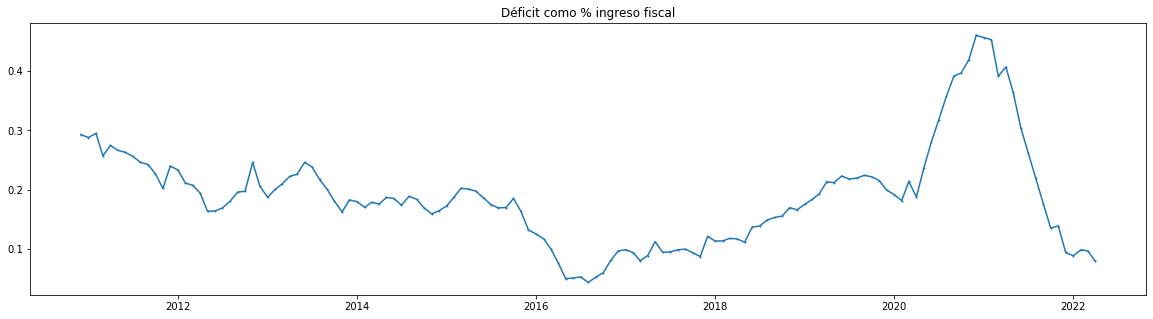

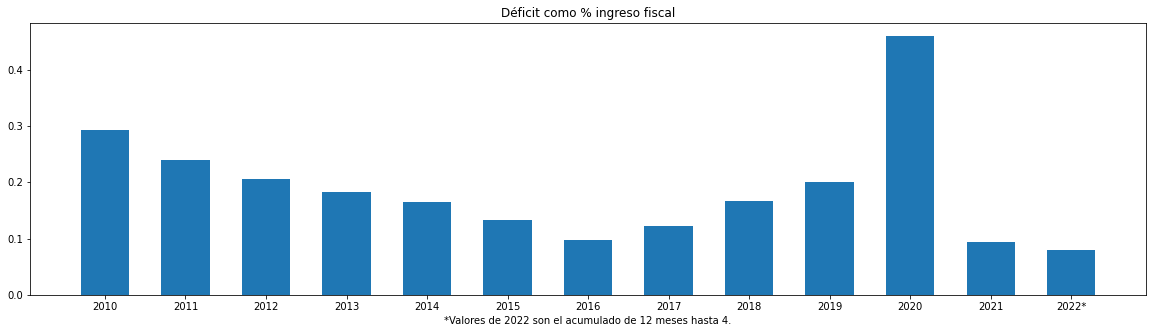

In [ ]:
# Déficit como porcentaje ingreso fiscal
yearly_total_revenue = trends.get_accumulated_values(fiscal_dataframe.total_revenue, lot_size=12)

latest_month = fiscal_dataframe.iloc[-1].month.month # 
last_many_months = -12 * 12 + (12-latest_month) - 1 # 7 años con offset (ajustar a dic)


plt.figure(figsize=(20,5))
plt.plot_date(x=fiscal_dataframe.date[last_many_months:],
              y = np.abs((np.array(deficit_yearly_values[last_many_months:]) 
                    / np.array(yearly_total_revenue[last_many_months:]))
              ),
              linestyle='-',
              markersize=1)
plt.title("Déficit como % ingreso fiscal")

plt.show()

# https://stackoverflow.com/questions/1403674/
# pythonic-way-to-return-list-of-every-nth-item-in-a-larger-list
plt.figure(figsize=(20,5))
# 12-month accumulated values are used. I.e., December of each year
# Latest year uses lates value, accumulated to 12 months 

deficit_revenue_ratio = {
    'labels': list(pd.DatetimeIndex(fiscal_dataframe.date[last_many_months:][0::12]).year.astype(str)) + ["2022*"],
    'values':  list(np.abs((np.array(deficit_yearly_values[last_many_months:]) # deficit (diciembre cada año, acum. 12 meses)
        / np.array(yearly_total_revenue[last_many_months:]))[0::12])) # sobre ingreso total (diciembre cada año, acum. 12 meses)
        + [np.abs(deficit_yearly_values[-1]/yearly_total_revenue[-1])]
}

plt.bar(deficit_revenue_ratio['labels'],
        deficit_revenue_ratio['values'],
        width=0.6
        )
plt.title("Déficit como % ingreso fiscal")
plt.xlabel(f"*Valores de 2022 son el acumulado de 12 meses hasta {latest_month}.")
plt.show()

In [ ]:
deficit_revenue_ratio_csv = "Deficit-Sobre-Ingreso-Fiscal.csv"
pd.DataFrame(deficit_revenue_ratio).to_csv(deficit_revenue_ratio_csv, index=False)

In [ ]:
bucket_path = 'ufm-market-trends/guatemala/sector-fiscal/deficit-sobre-ingreso-fiscal'
csv_file = deficit_revenue_ratio_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Deficit-Sobre-Ingreso-Fiscal.csv [Content-Type=text/csv]...
/ [1 files][  337.0 B/  337.0 B]                                                
Operation completed over 1 objects/337.0 B.                                      
Copying gs://ufm-market-trends/guatemala/sector-fiscal/deficit-sobre-ingreso-fiscal/Deficit-Sobre-Ingreso-Fiscal.csv [Content-Type=text/csv]...
/ [1 files][  337.0 B/  337.0 B]                                                
Operation completed over 1 objects/337.0 B.                                      
labels,values
2010,0.2928596049175553
2011,0.24000060368664214
2012,0.20590754961110896
2013,0.18290547316635236
2014,0.1645662949880246
2015,0.13250774813411317
2016,0.09690371359611602
2017,0.1214915256497668
2018,0.16631831881928538
2019,0.19973323387603154
2020,0.45989375580015446
2021,0.09442637511819318
2022*,0.07963665065033294


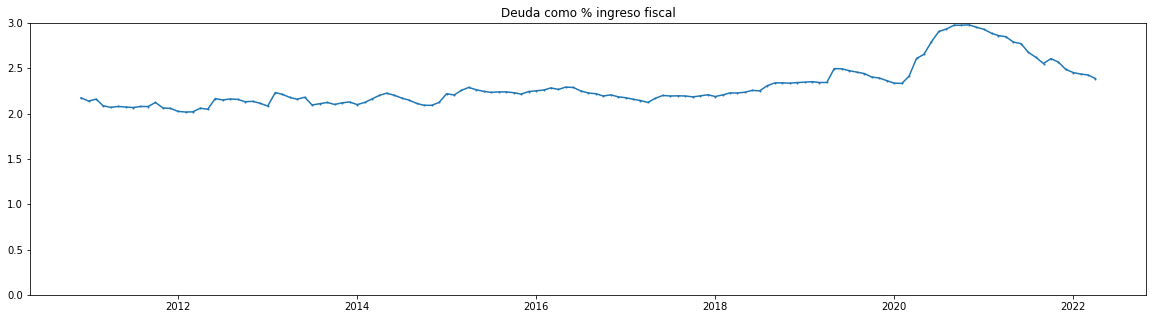

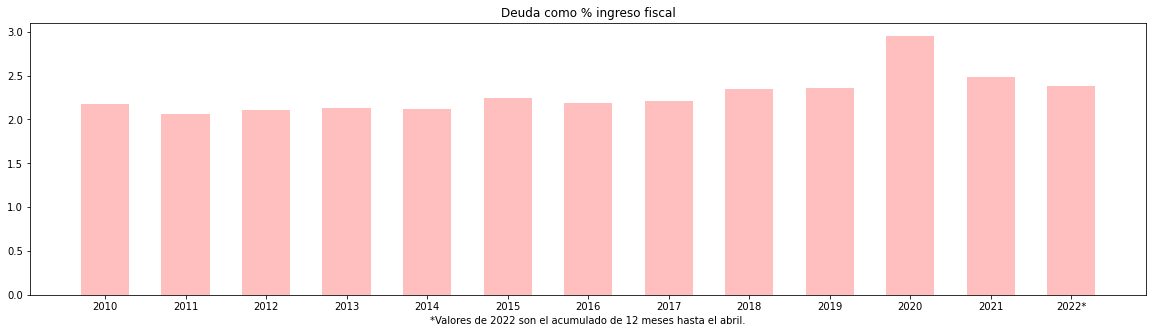

[2.17 2.06 2.11 2.13 2.12 2.24 2.19 2.21 2.34 2.36 2.95 2.49 2.39]


In [ ]:
# Deuda como porcentaje ingreso fiscal
total_debt_values = list(fiscal_dataframe[TOTAL_DEBT])


latest_month = fiscal_dataframe.iloc[-1].month.month # 
last_many_months = -12 * 12 + (12-latest_month) - 1 # 12 años con offset (ajustar a dic)


plt.figure(figsize=(20,5))
plt.plot_date(x=fiscal_dataframe.date[last_many_months:],
              y = np.abs((np.array(total_debt_values[last_many_months:]) 
                    / np.array(yearly_total_revenue[last_many_months:]))
              ),
              linestyle='-',
              markersize=1)
plt.ylim(0,3)
plt.title("Deuda como % ingreso fiscal")

# plt.show()

# https://stackoverflow.com/questions/1403674/
# pythonic-way-to-return-list-of-every-nth-item-in-a-larger-list
plt.figure(figsize=(20,5))
# 12-month accumulated values are used. I.e., December of each year
# Latest year uses lates value, accumulated to 12 months 

debt_revenue_ratio = {
    'labels': list(pd.DatetimeIndex(fiscal_dataframe.date[last_many_months:][0::12]).year.astype(str)) + ["2022*"],
    'values':  list(np.abs((np.array(total_debt_values[last_many_months:]) # deficit (diciembre cada año, acum. 12 meses)
        / np.array(yearly_total_revenue[last_many_months:]))[0::12])) # sobre ingreso total (diciembre cada año, acum. 12 meses)
        + [np.abs(total_debt_values[-1]/yearly_total_revenue[-1])]
}

plt.bar(debt_revenue_ratio['labels'],
        debt_revenue_ratio['values'],
        width=0.6, color='r', alpha=0.25
        )
plt.title("Deuda como % ingreso fiscal")
plt.xlabel("*Valores de 2022 son el acumulado de 12 meses hasta el abril.")
plt.show()
print(np.round(debt_revenue_ratio['values'],2))


In [ ]:
debt_revenue_ratio_csv = "Deuda-Sobre-Ingreso-Fiscal.csv"
pd.DataFrame(debt_revenue_ratio).to_csv(debt_revenue_ratio_csv, index=False)

In [ ]:
bucket_path = 'ufm-market-trends/guatemala/sector-fiscal/deuda-sobre-ingreso-fiscal'
csv_file = debt_revenue_ratio_csv

!gsutil -h "Cache-Control:public, max-age=1" cp {csv_file} gs://{bucket_path}
!gsutil cp gs://{bucket_path}/{csv_file} gs://{bucket_path}/{'archivo'}/{today+'-'+csv_file}  
!gsutil cat gs://{bucket_path}/{csv_file}

Copying file://Deuda-Sobre-Ingreso-Fiscal.csv [Content-Type=text/csv]...
/ [1 files][  319.0 B/  319.0 B]                                                
Operation completed over 1 objects/319.0 B.                                      
Copying gs://ufm-market-trends/guatemala/sector-fiscal/deuda-sobre-ingreso-fiscal/Deuda-Sobre-Ingreso-Fiscal.csv [Content-Type=text/csv]...
/ [1 files][  319.0 B/  319.0 B]                                                
Operation completed over 1 objects/319.0 B.                                      
labels,values
2010,2.174126899596741
2011,2.057901334985804
2012,2.113629153914969
2013,2.1284138531859833
2014,2.123619208990017
2015,2.2431436696088585
2016,2.1853822083672245
2017,2.2079752887522948
2018,2.34225455983945
2019,2.364202544024332
2020,2.9530262943536827
2021,2.4869798968646504
2022*,2.386916546871239
